<a href="https://colab.research.google.com/github/RudkovYaroslav/research_analysis/blob/main/research_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

__Цель исследования__

1. Определить рыночную стоимость объектов недвижимости,н
2. Построить автоматизированную систему. которая отследит аномалии и мошенническую деятельность.
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

__Ход исследования__

Данные о недвижимости я получу из файла "real_estate_data.csv". О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа

Таким образом, моё исследование пройдет в семь этапов:

- Обзор данных.
- Предобработка данных.
- Расчеты и добавление результатов в таблицу.
- Проведение анализа для Ленинградской области,
- Проведение анализа для Санкт-Петербурга.
- Различаются ли факторы, которые влияют на ценообразование стоимости квартир.
- Написание общего вывода.

### Откройте файл с данными и изучите общую информацию

Импорт требуемых библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Установка стандартных значений размера для выводимых графиков

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)

Чтение DataFrame

In [ ]:
df = pd.read_csv('/real_estate_data.csv', sep='\t')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

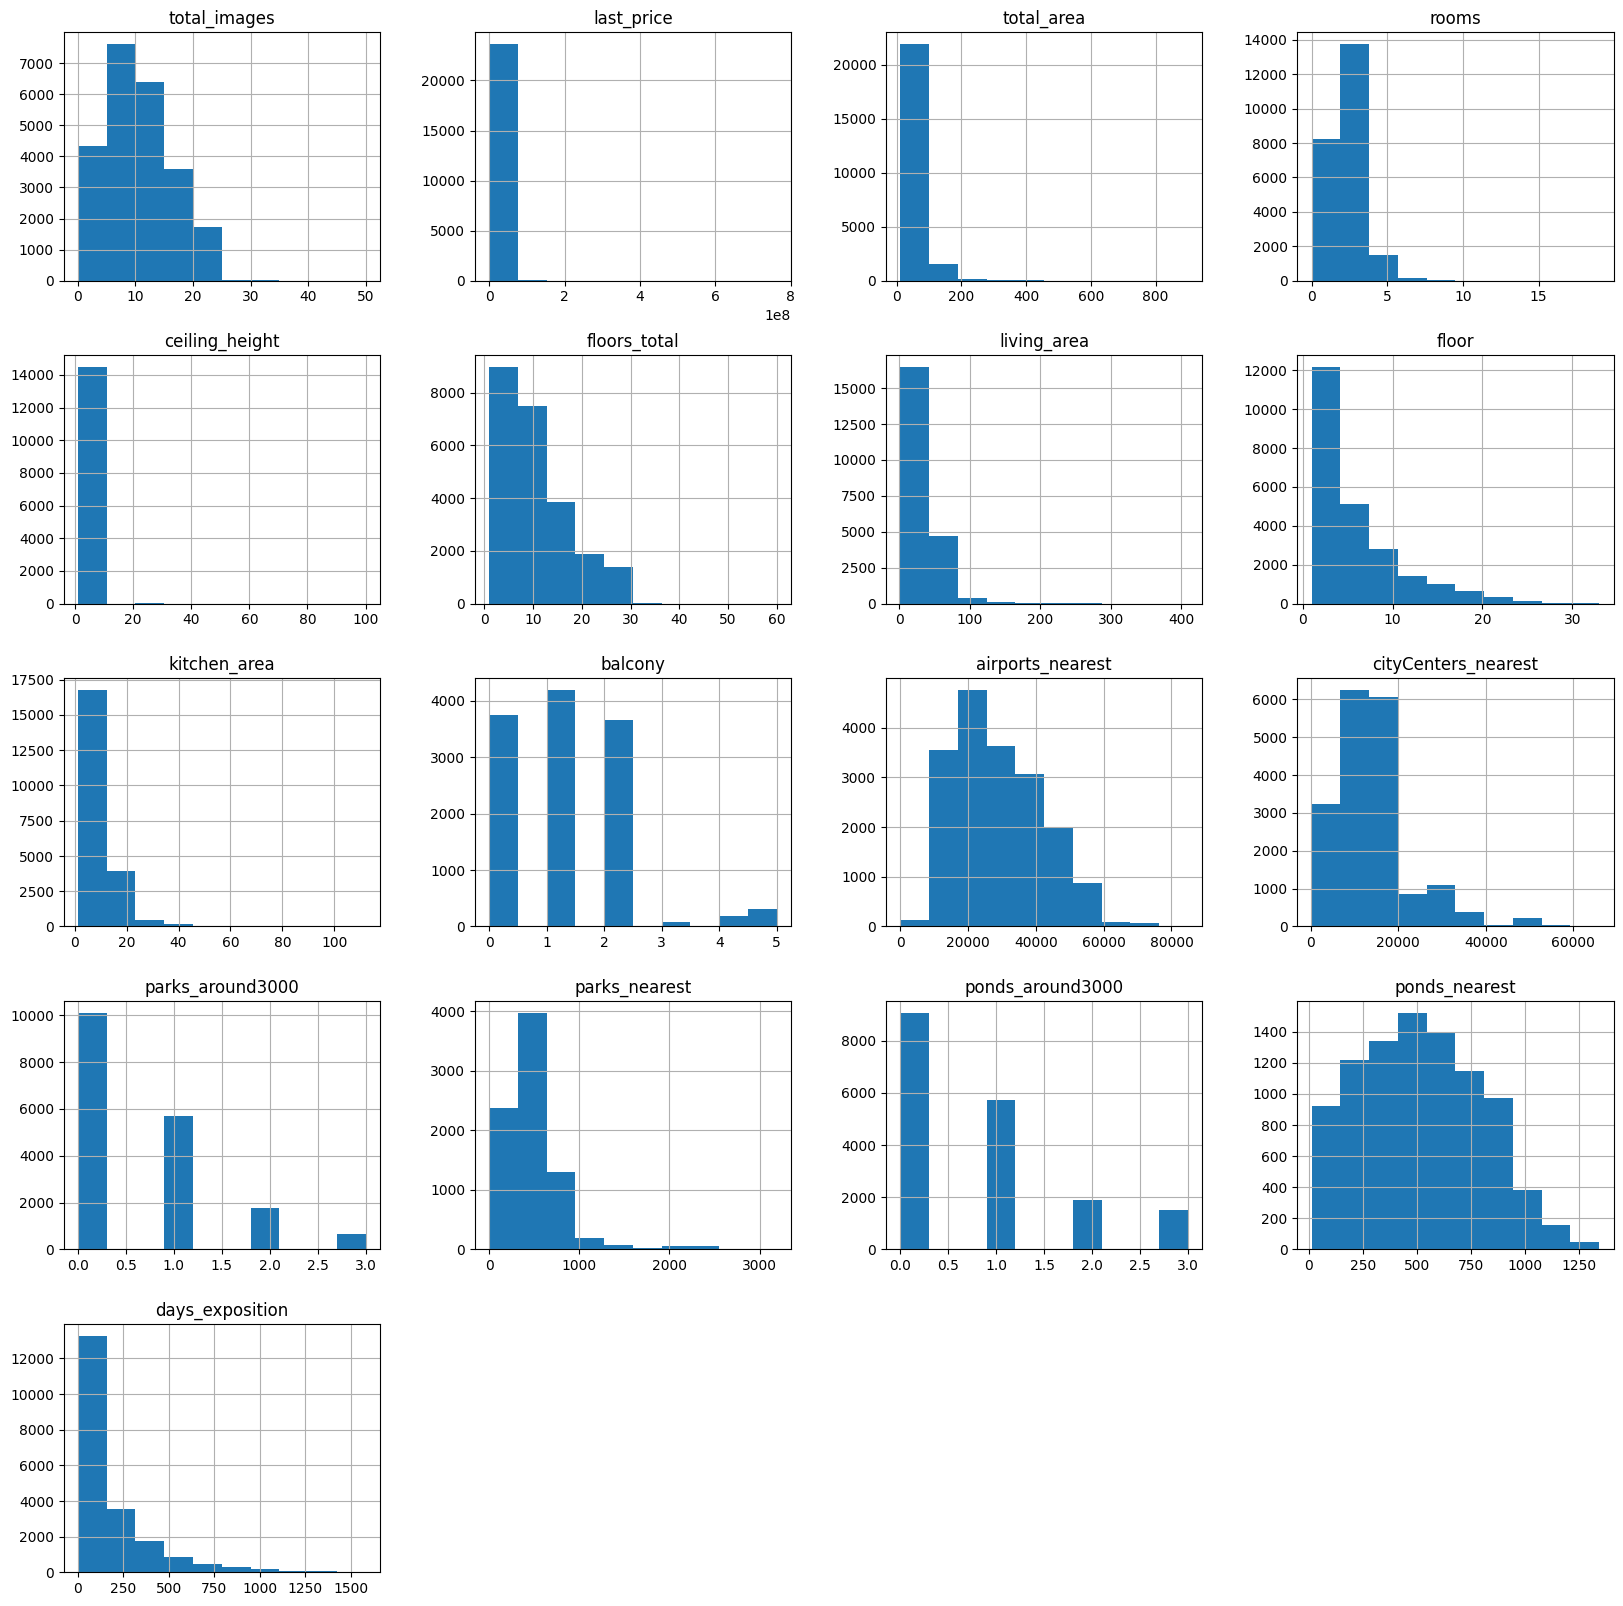

In [ ]:
df.hist(figsize=(20, 20))
pass #Чтобы не было лишних слов в выводе

**Вывод по разделу 1:**

Ознакомились с DataFrame. Изначально можно уже выделить определенное количество проблем, с которыми придется столкнуться при предобработке, но данные выглядят многообещающе.Гистограммы по большей части представляют нормальное распределение(или Bell-curve) там, где оно должно быть.

### Выполните предобработку данных

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
pd.DataFrame(round(df.isna().mean()*100)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
is_apartment,88.000000
parks_nearest,66.000000
ponds_nearest,62.000000
balcony,49.000000
ceiling_height,39.000000
ponds_around3000,23.000000
parks_around3000,23.000000
cityCenters_nearest,23.000000
airports_nearest,23.000000
days_exposition,13.000000


**Для простоты пойдем по списку**

- **1** Ceiling_height заменим значения на средние, опираясь на местоположение, так как там обычно свои стандарты применяются при строительстве

In [ ]:
for d in df['locality_name'].unique():
    df.loc[(df['locality_name'] == d) & (df['ceiling_height'].isna()), 'ceiling_height']\
    = round(df[df['locality_name'] == d]['ceiling_height'].mean(), 2)

- **2** Floors_total оставим без изменений, так как 86 пропусков не так уж и много

- **3** Living_area также оставим как есть. Решение проблемы пропусков займет слишком много времени, а еще не очень понятно, на каком основании вставлять значения.

- 4 Is_apartment  проверим, есть ли заивсимость по цене у того, что имеем

In [ ]:
df['is_apartment'].value_counts()

is_apartment
False    2725
True       50
Name: count, dtype: int64

In [ ]:
df[df['is_apartment'] == True].sort_values('last_price') #Проверим цены у апартаментов, можем ли по ним базировать выбор

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,2.80,9.0,NaN,1,True,...,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
11779,12,2290000.0,43.00,2017-06-09T00:00:00,2,2.50,5.0,29.000000,2,True,...,5.00,1.0,посёлок Щеглово,NaN,NaN,NaN,NaN,NaN,NaN,46.0
12160,8,2450000.0,43.00,2018-08-14T00:00:00,1,2.75,5.0,16.000000,1,True,...,NaN,NaN,Санкт-Петербург,26069.0,29493.0,0.0,NaN,0.0,NaN,8.0
7056,8,3500000.0,56.40,2016-04-06T00:00:00,2,2.60,5.0,31.000000,2,True,...,10.00,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,635.0
20534,18,3600000.0,31.23,2016-04-13T00:00:00,1,2.80,23.0,15.000000,11,True,...,10.00,2.0,Санкт-Петербург,33705.0,14883.0,0.0,NaN,0.0,NaN,767.0
11179,8,3676365.0,33.00,2018-07-23T00:00:00,1,3.00,4.0,27.060000,1,True,...,NaN,NaN,Санкт-Петербург,46015.0,20802.0,0.0,NaN,1.0,792.0,NaN
5076,0,3850000.0,30.50,2018-10-03T00:00:00,1,24.00,5.0,19.500000,1,True,...,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
22938,14,4000000.0,98.00,2018-03-15T00:00:00,4,27.00,2.0,73.000000,2,True,...,9.00,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
19034,20,4100000.0,32.00,2017-04-07T00:00:00,1,2.70,27.0,16.000000,22,True,...,8.00,1.0,Санкт-Петербург,20998.0,22710.0,0.0,NaN,1.0,767.0,388.0
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN


In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Нет явной зависимости = ставим False

- 5 Kitchen_area оставим как есть. Решение проблемы пропусков займет слишком много времени, а еще не очень понятно, на каком основании вставлять значения.

- 6 Balcony посмотрим, что имеем:

In [ ]:
df['balcony'].value_counts()

balcony
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: count, dtype: int64

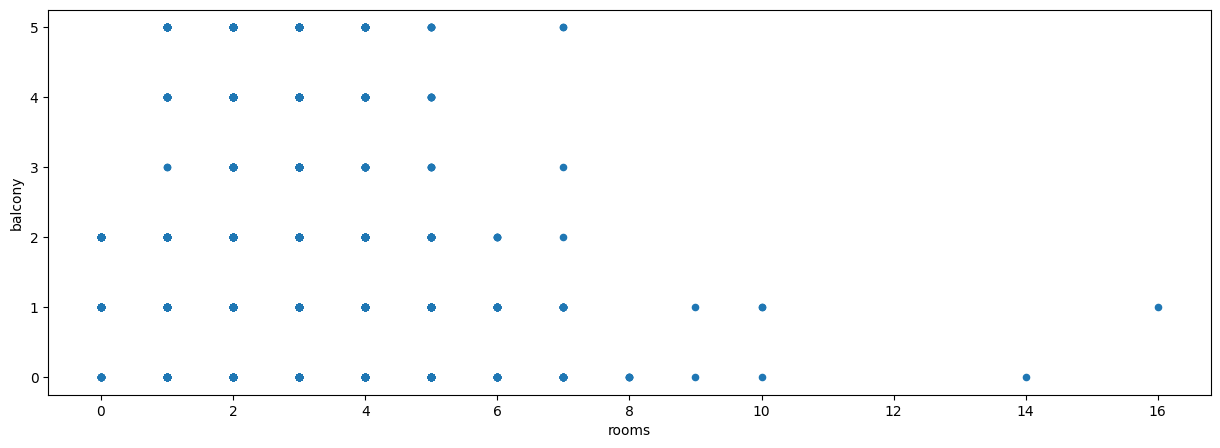

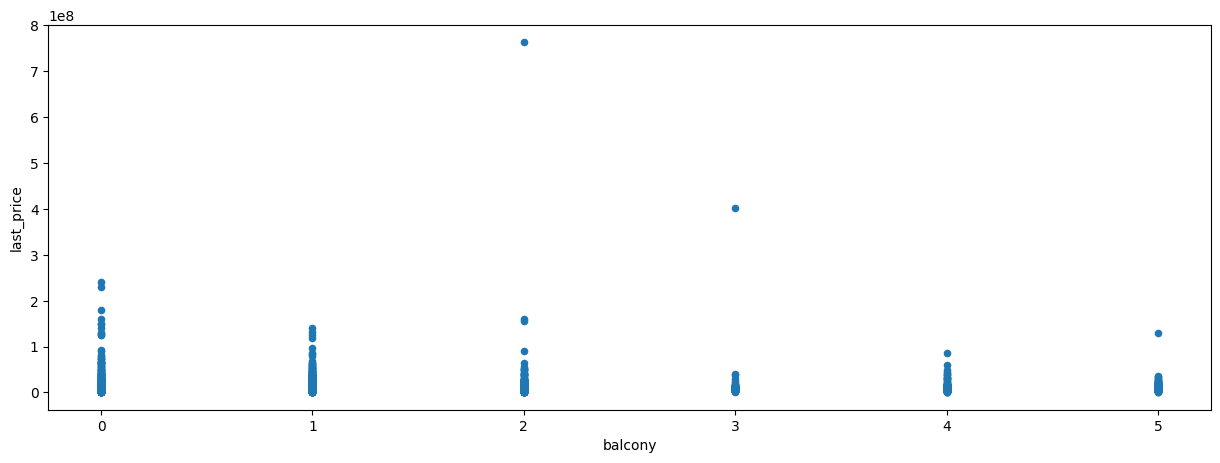

In [ ]:
df.plot(y='balcony', x='rooms', kind='scatter')
df.plot(x='balcony', y='last_price', kind='scatter')
pass

Мы не можем фактически поставить зависимость между количеством балконов и ценой/количеством комнат, поэтому заменим все пропуски на 0.(И да, 5 балконов действительно может существовать)

In [ ]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].value_counts()

balcony
0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: count, dtype: int64

- 7 Locality_name  оставим, как есть, но пропуски заменим на unknown

In [ ]:
df['locality_name'] = df['locality_name'].fillna('Unknown')

- 8 Airports_nearest нужно оставить NaN, так как мы не можем заменить на 0. NaN появился из-за того что нет аэропорта в ближайшей доступности, но это не значит что расстояние 0. Также не значит, что можем заменить на медианное. Можем только оставить NaN

- 9 cityCenters_nearest проверим одну теорию:

In [ ]:
df[(df['cityCenters_nearest'].isna()) & (df['parks_around3000'].isna()) & (df['ponds_around3000'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.62,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.94,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.66,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.63,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.61,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.54,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как мы видим - все пропуски взаимосвязаны в этих 3 категориях. Можем лишь заменить два столбца на 0, так как они категориальные и по факту будут отображать количество ближайших парков/озер в 0. Остальные оставим так, как есть из-за той же причины, что и с аэропортами.

In [ ]:
df[['parks_around3000','ponds_around3000']] = df[['parks_around3000','ponds_around3000']].fillna(0)

- 10 Days_exposition самое логичное - что объявление еще висит. Значит оставляем NaN, так как нам нужно будет проделывать операции

Дальше разберемся с типами данных:

In [ ]:
df['last_price'] = df['last_price'].astype(int)

In [ ]:
df['balcony'] = df['balcony'].astype(int)

In [ ]:
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

Заменили все численные на реально численные, кроме тех колонок, где мы оставили NaN, так как там не получится заменить.

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Преобразуем дату в формат даты

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')\
.replace(['поселок городского', 'городской поселок', 'поселок городского типа'], 'поселок', regex=True)

Заменим названия на приведенные к общему стандарту

Посмотрим на очевидные выбросы:

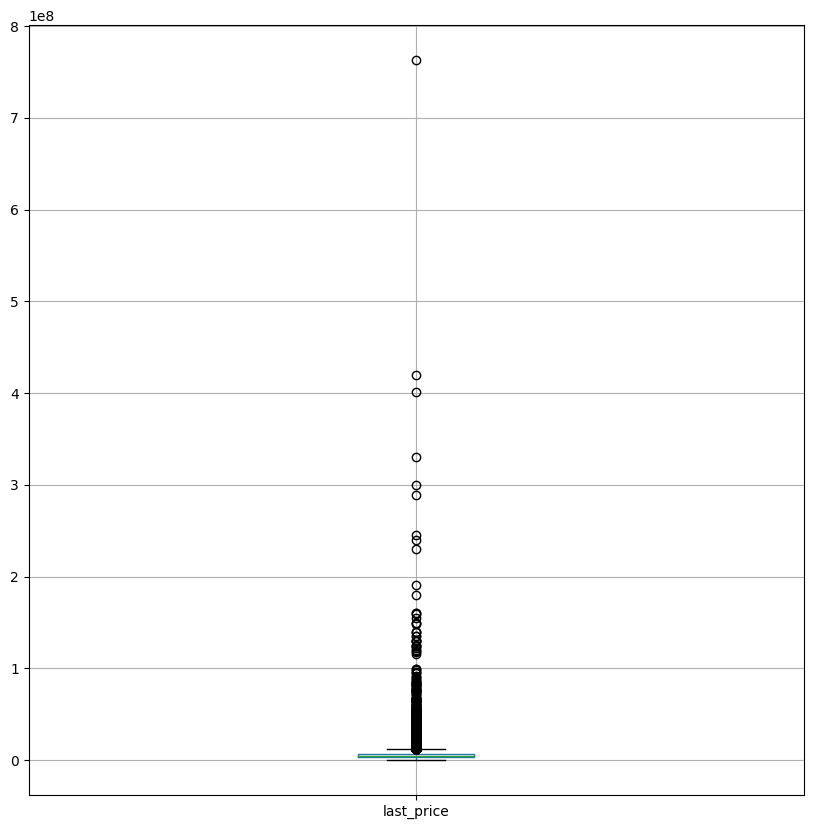

In [ ]:
df.boxplot(column='last_price', figsize=(10,10))
pass

Тут видим, что есть совсем чуть-чуть значений, которые сильно выбиваются. Лучше от них избавиться

In [ ]:
df.sort_values('last_price', ascending=False).head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000,400.0,2017-09-30,7,2.80,10.0,250.0,10,False,...,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
14706,15,401300000,401.0,2016-02-20,5,2.80,9.0,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0
15651,20,300000000,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
22831,18,289238400,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,...,30.2,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN
16461,17,245000000,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,...,29.8,0,Санкт-Петербург,33143.0,6235.0,3,400.0,3,140.0,249.0
13749,7,240000000,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199.0
5893,3,230000000,500.0,2017-05-31,6,2.80,7.0,NaN,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0
8900,13,190870000,268.0,2016-03-25,3,2.80,8.0,132.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,901.0


In [ ]:
df = df[df['last_price'] < 160000000]

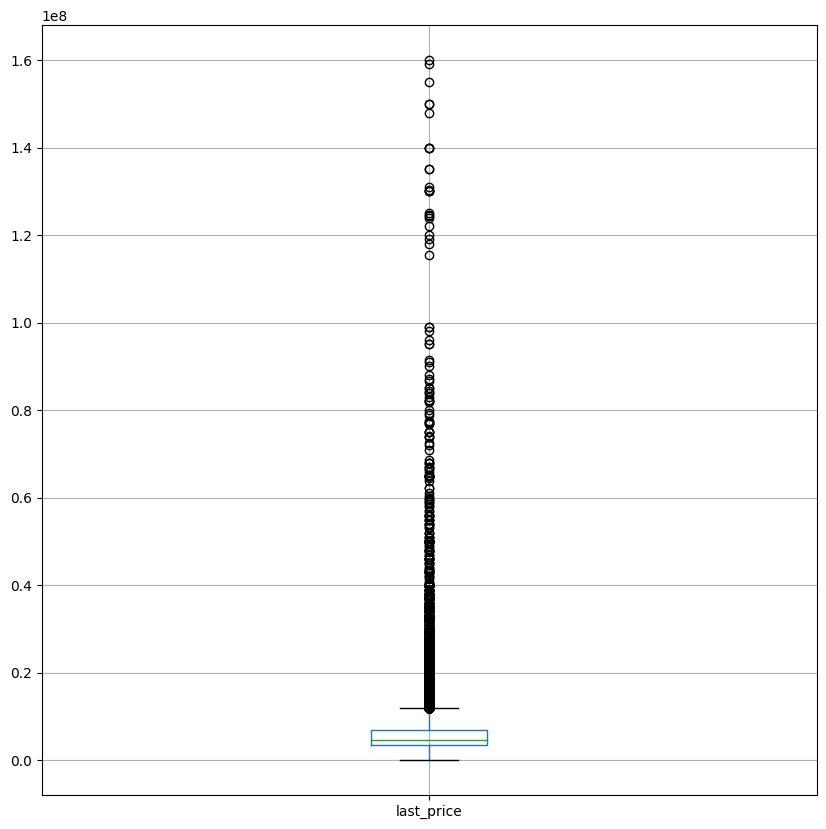

In [ ]:
df.boxplot(column='last_price', figsize=(10,10))
pass

Также посмотрим на минимальный порог. Есть ли ненормальные цены:

In [ ]:
df[df['last_price'] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


In [ ]:
df = df[(df['last_price'] < 100000000) & (df['last_price'] > 400000)]

Выбрали цифру 100000000, так как на графике видно, что выше лишь аномалии

Пройдемся по другим столбцам, чтобы определить явные выбросы

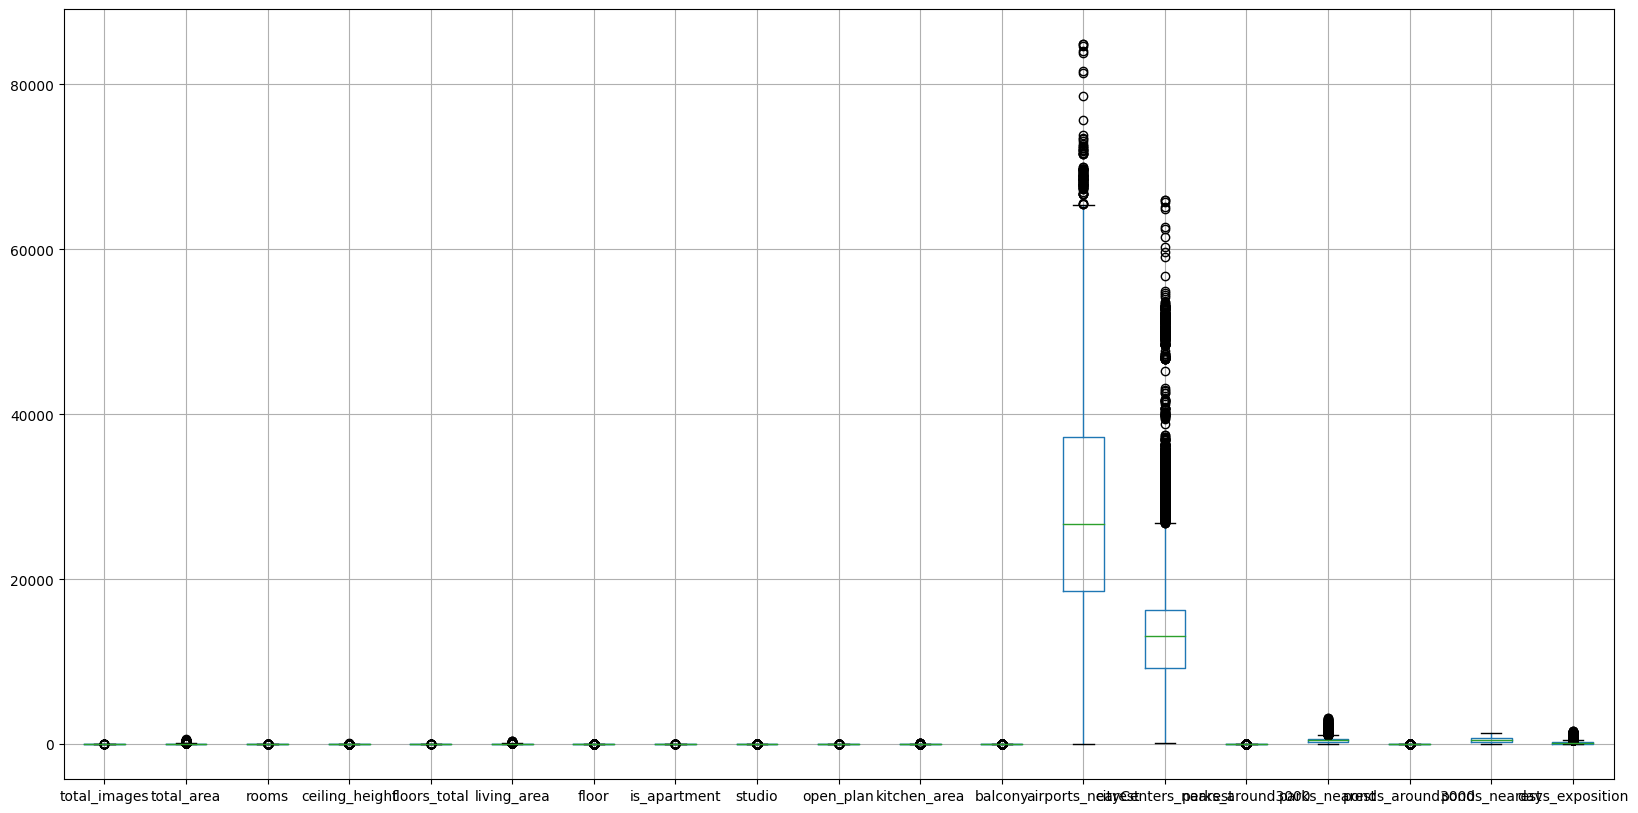

In [ ]:
df_to_analyze = df.drop(columns='last_price')#Создадим заглушку для того, чтобы проверить графики размаха других столбцов
df_to_analyze.boxplot(figsize=(20,10))
pass

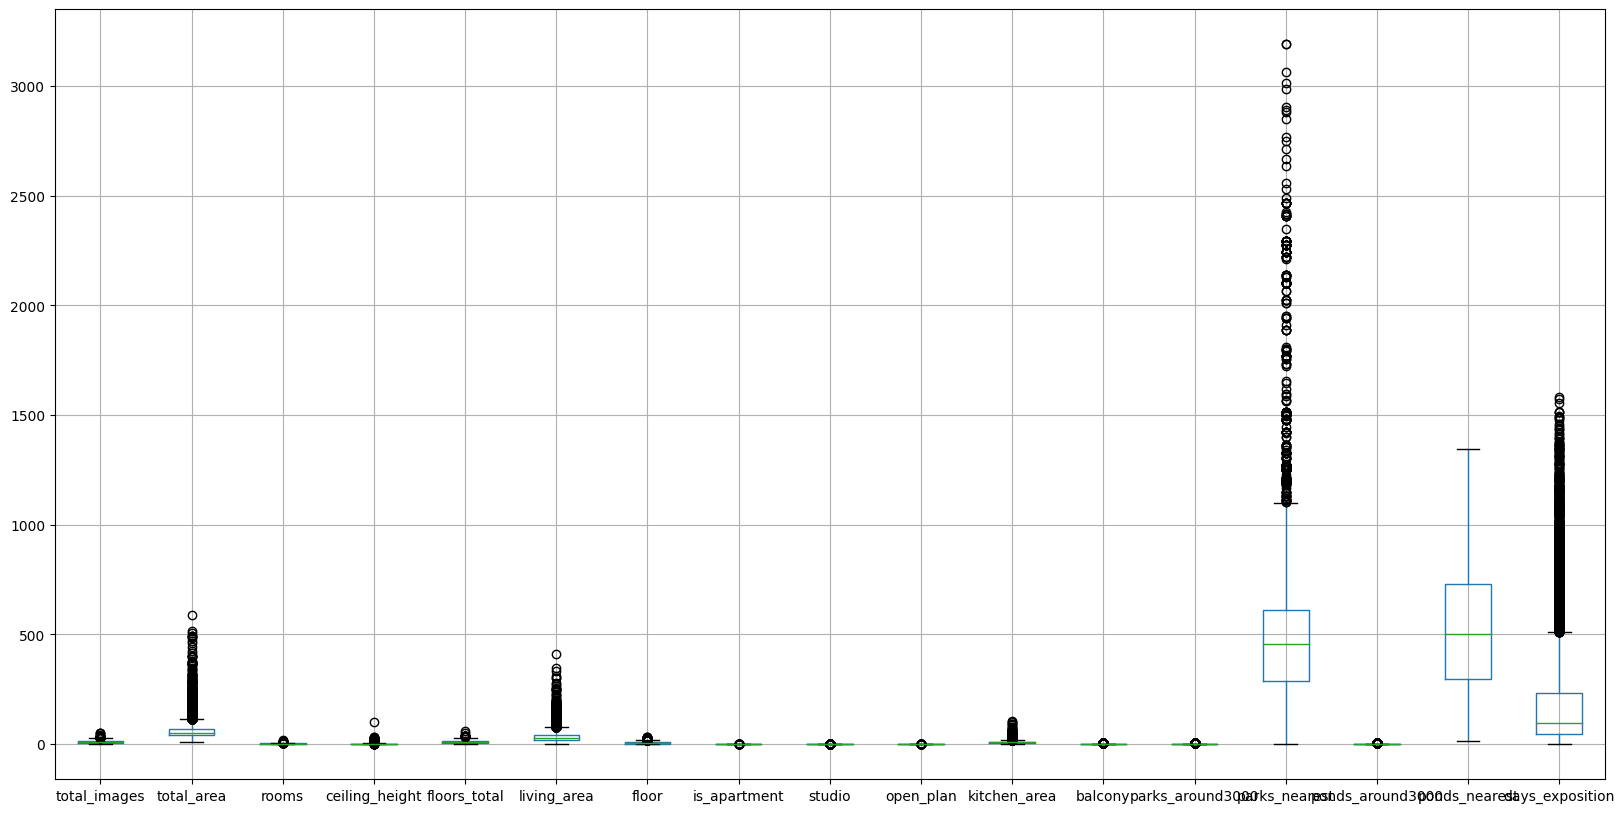

In [ ]:
df_to_analyze_2 = df_to_analyze.drop(columns=['airports_nearest', 'cityCenters_nearest'])#Заглушка №2
df_to_analyze_2.boxplot(figsize=(20,10))
pass

Явных аномалий нет.

In [ ]:
df = df.rename(columns={'locality_name': 'location','cityCenters_nearest': 'city_center_nearest', \
                        'parks_around3000':'parks_around_3km', 'ponds_around3000':'ponds_around_3km' })

Напоследок переименуем столбцы для удобства и чтобы было по правилам

Также стоит проверить DataFrame на явные дубликаты. Хоть на первый взгляд их нет, но нужно быть уверенным в этом.

In [ ]:
df.duplicated().sum()

0

И все же задвоений не оказалось. Отлично, меньше работы.

**Вывод по разделу 2:**

В результате проведенной предобработки разобрались с бОльшим количеством пропусков. Избавились от явных аномалий, явных дубликатов, пытаясь сохранить как можно больше строк. Переименовали значения для одного стиля, а также колонки для удобства работы. DataFrame готов к анализу.

### Добавьте в таблицу новые столбцы

#### Добавляем столбец со стоимостью квадратного метра

In [ ]:
df['quad_m_cost'] = round(df['last_price'] / df['total_area'], 2)

#### Добавляем столбцы с днем, месяцем и годом создания объявления

In [ ]:
df['publication_day'] = df['first_day_exposition'].dt.day_name()

In [ ]:
df['publication_month'] = df['first_day_exposition'].dt.month_name()

In [ ]:
df['publication_year'] = df['first_day_exposition'].dt.to_period("Y")
df['publication_year'] = df['publication_year'].astype(str)#Потом оказывается, что только тип данных года не str

Мы все знаем английский язык(надеюсь), так что оставим так. Конечно, можно переименовать на русский мотив, но это лишняя работа

In [ ]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,quad_m_cost,publication_day,publication_month,publication_year
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,Thursday,March,2019
1,7,3350000,40.40,2018-12-04,1,2.64,11.0,18.60,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,Tuesday,December,2018
2,10,5196000,56.00,2015-08-20,2,2.80,5.0,34.30,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,Thursday,August,2015
3,0,64900000,159.00,2015-07-24,3,2.80,14.0,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.10,Friday,July,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,Tuesday,June,2018
5,10,2890000,30.40,2018-09-10,1,2.62,12.0,14.40,5,False,...,NaN,0,NaN,0,NaN,55.0,95065.79,Monday,September,2018
6,6,3700000,37.30,2017-11-02,1,2.63,26.0,10.60,6,False,...,19143.0,0,NaN,0,NaN,155.0,99195.71,Thursday,November,2017
7,5,7915000,71.60,2019-04-18,2,2.80,24.0,NaN,22,False,...,11634.0,0,NaN,0,NaN,NaN,110544.69,Thursday,April,2019
8,20,2900000,33.16,2018-05-23,1,2.94,27.0,15.43,26,False,...,NaN,0,NaN,0,NaN,189.0,87454.76,Wednesday,May,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,15008.0,0,NaN,0,NaN,289.0,88524.59,Sunday,February,2017


#### Добавляем столбец с типом этажа

In [ ]:
def floor(row):
    if row['floor'] == row['floors_total']:
        return 'Last'
    elif row['floor'] == 1:
        return 'First'
    else:
        return 'Else'

In [ ]:
df['floor_type'] = df.apply(floor, axis=1)

In [ ]:
df['floor_type'].unique()

array(['Else', 'First', 'Last'], dtype=object)

Все значения как надо, значит ошибок не вышло

#### Добавляем столбец с расстоянием до центра в км

In [ ]:
#df['city_center_nearest_km'] = (df['city_center_nearest'] / 1000).astype('int64', errors='ignore')

In [ ]:
df['city_center_nearest_km'] = round((df['city_center_nearest'] / 1000), 0)

**Вывод по разделу 3:**

Отредактировали DataFrame, добавив нужные столбцы для анализа. Кое-где категоризировали переменные, где-то создали соверешнно новые значения в результате взаимодействий со столбцами. Подготовили почву для проведения исследовательского анализа.

### Проведите исследовательский анализ данных

#### Изучение параметров DataFrame ####
- **1** Total_area

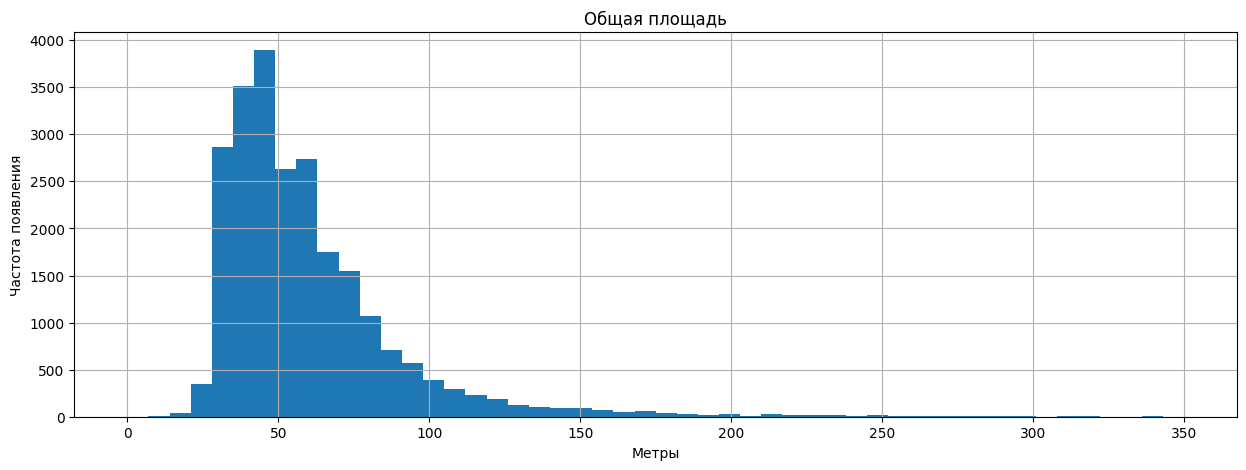

In [ ]:
pd.Series(df['total_area']).plot(kind='hist', bins=50, range=(0,350), grid=True, title='Общая площадь')
plt.xlabel('Метры')
plt.ylabel('Частота появления')
pass

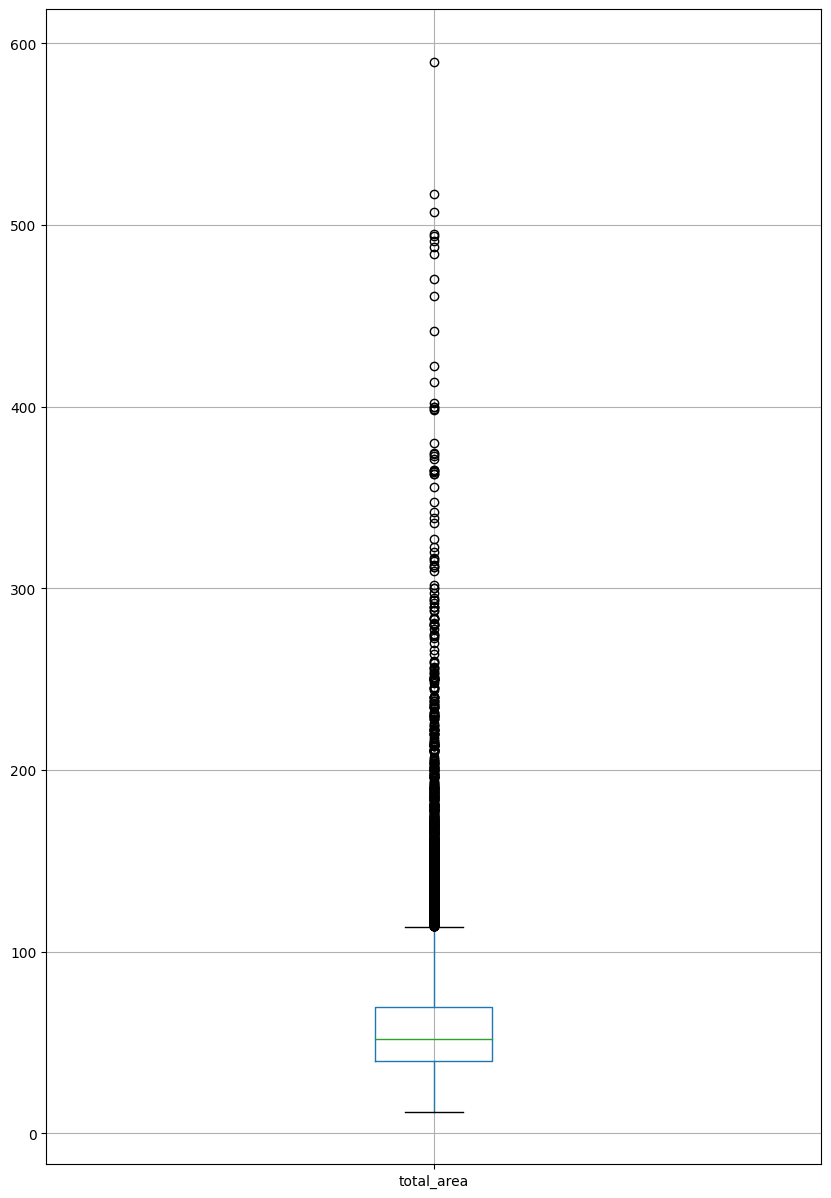

In [ ]:
df.boxplot(column='total_area', figsize=(10,15))
pass

В целом ничего необычного, есть небольшое количество выбросов, но их можно оставить.

- **2** Living_area

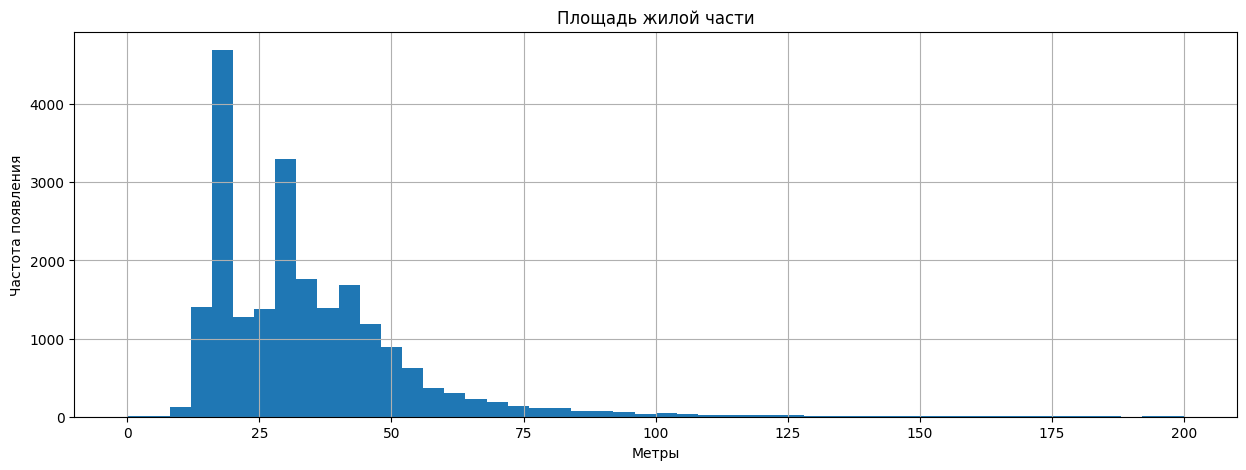

In [ ]:
pd.Series(df['living_area']).plot(kind='hist', bins=50, range=(0,200), grid=True, title='Площадь жилой части')
plt.xlabel('Метры')
plt.ylabel('Частота появления')
pass

In [ ]:
df[df['living_area'] < 25]['location'].value_counts()

location
Санкт-Петербург                               4679
поселок Мурино                                 337
поселок Парголово                              186
поселок Шушары                                 176
деревня Кудрово                                169
                                              ... 
поселок Форт Красная Горка                       1
поселок Сельцо                                   1
поселок при железнодорожной станции Вещево       1
поселок Песочный                                 1
поселок Глебычево                                1
Name: count, Length: 208, dtype: int64

Здесь, в целом, тоже все в порядке. Скачки из-за типов квартир. Код сверху это доказывает(так как типовые квартиры расположены в городах и там одинаковый метраж и планировка).

- **3** Kitchen_area

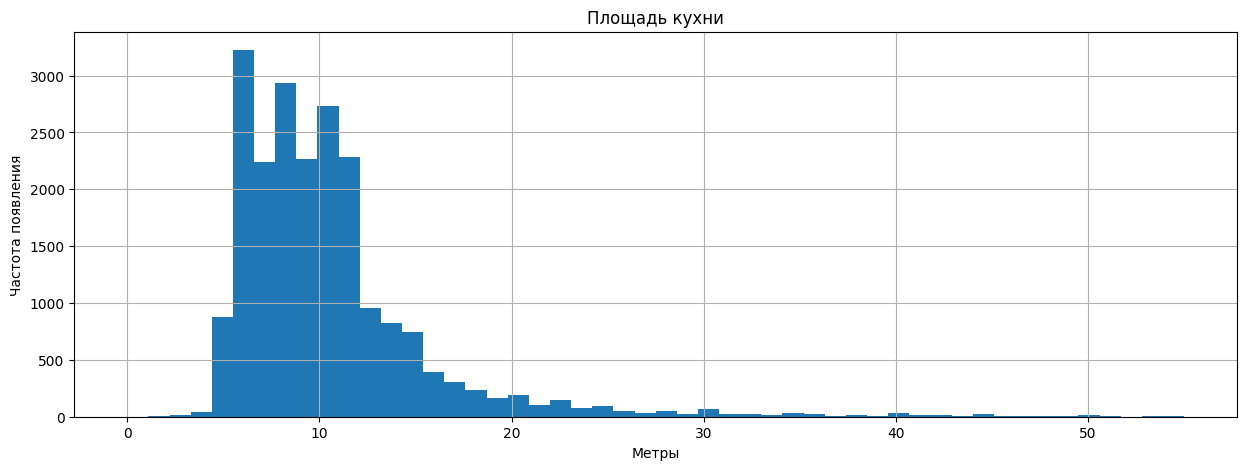

In [ ]:
pd.Series(df['kitchen_area']).plot(kind='hist', bins=50, range=(0,55), grid=True, title='Площадь кухни')
plt.xlabel('Метры')
plt.ylabel('Частота появления')
pass

Здесь тоже все в порядке. Нормальное распределение.

- **4** Last_price

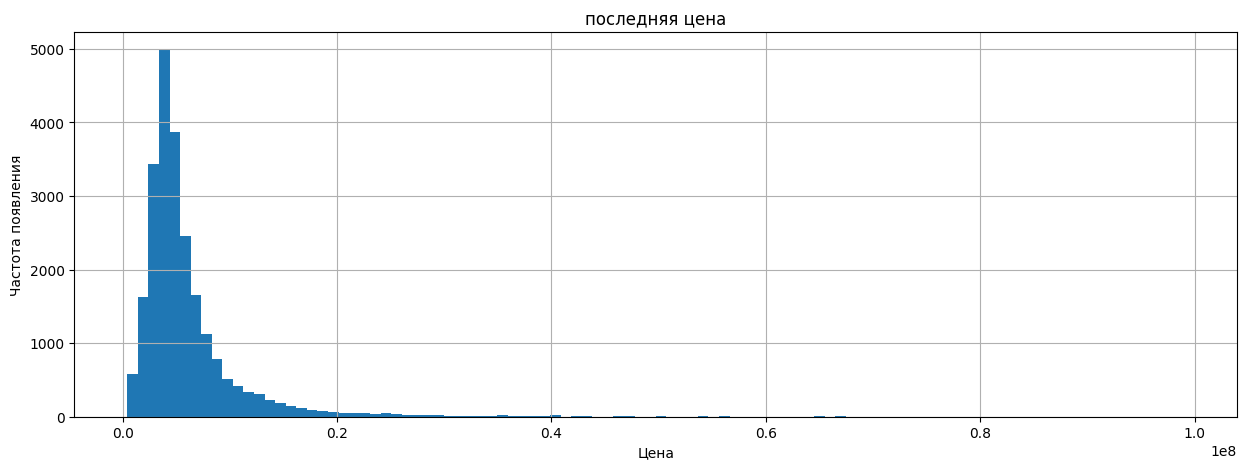

In [ ]:
pd.Series(df['last_price']).plot(kind='hist', bins=100, grid=True, title='последняя цена')
plt.xlabel('Цена')
plt.ylabel('Частота появления')
pass

In [ ]:
df[df['last_price'] > 40000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,quad_m_cost,publication_day,publication_month,publication_year,floor_type,city_center_nearest_km
3,0,64900000,159.0,2015-07-24,3,2.8,14.0,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,Friday,July,2015,Else,7.0
51,7,45000000,161.0,2017-10-17,3,3.2,8.0,38.0,4,False,...,NaN,3,99.0,541.0,279503.11,Tuesday,October,2017,Else,7.0
155,8,96000000,317.0,2017-07-07,4,3.5,3.0,183.0,3,False,...,508.0,3,366.0,62.0,302839.12,Friday,July,2017,Last,2.0
411,1,40662000,151.0,2014-12-09,3,2.8,8.0,85.0,3,False,...,630.0,3,100.0,594.0,269284.77,Tuesday,December,2014,Else,6.0
464,15,66571000,280.3,2015-06-11,6,5.2,8.0,159.5,7,False,...,187.0,1,616.0,578.0,237499.11,Thursday,June,2015,Else,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22633,18,47500000,125.0,2016-06-27,3,2.8,8.0,67.0,2,False,...,125.0,0,NaN,252.0,380000.00,Monday,June,2016,Else,6.0
22709,20,59000000,127.5,2016-12-21,4,3.0,12.0,85.0,8,False,...,84.0,3,234.0,635.0,462745.10,Wednesday,December,2016,Else,7.0
22804,4,81960000,205.0,2017-09-29,4,3.2,9.0,108.0,3,False,...,679.0,1,227.0,169.0,399804.88,Friday,September,2017,Else,2.0
22907,9,65000000,228.0,2016-06-02,4,2.8,5.0,200.0,2,False,...,619.0,3,269.0,NaN,285087.72,Thursday,June,2016,Else,1.0


Видим, что все равно 28 значений немного выбивают график. Мы уже избавились от совсем невозможных значений ранее. Лучше их оставить.

- **5** Rooms

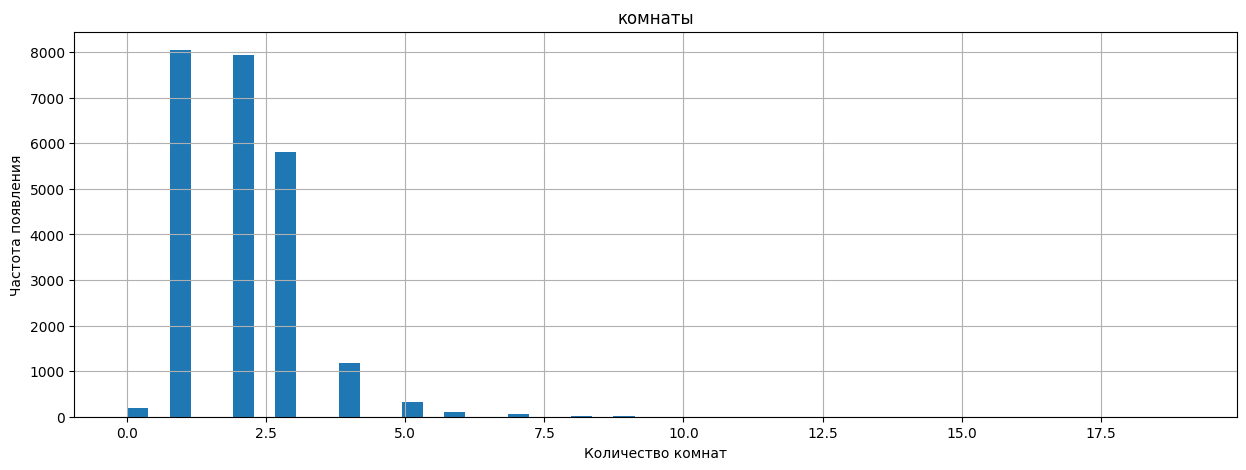

In [ ]:
pd.Series(df['rooms']).plot(kind='hist', bins=50, grid=True, title='комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Частота появления')
pass

Увидели, что есть квартиры с 0 комнат. В теории это возможно(изба это 0-комнатное жилое помещение). Но для этого надо кое-что проверить:

In [ ]:
df[df['rooms'] == 0]['location'].value_counts()

location
Санкт-Петербург                 110
поселок Мурино                   27
деревня Кудрово                  16
Никольское                        6
Всеволожск                        6
Кудрово                           5
поселок Шушары                    4
поселок Парголово                 4
Сертолово                         3
поселок Бугры                     3
поселок Новоселье                 2
поселок Новый Свет                1
поселок Большая Ижора             1
Отрадное                          1
поселок Янино-1                   1
деревня Новое Девяткино           1
Тосно                             1
поселок типа Дубровка             1
поселок Петро-Славянка            1
поселок типа имени Свердлова      1
поселок станции Корнево           1
Мурино                            1
Name: count, dtype: int64

В Питере это буквально абсурд. В Санкт-Петербурге такое невозможно

In [ ]:
df[df['rooms'] == 0] = df[(df['rooms'] == 0) & ~(df['location'] == 'Санкт-Петербург')]
df = df.dropna(subset=['total_images']) #Так как в этом столбце не было NaN до этого, а в rooms еще остались

In [ ]:
df=df[df['rooms'] <7]

Бессмысслено измерять с количеством комнат больше 7

- **6** Ceiling_height

In [ ]:
pd.Series(df['ceiling_height']).value_counts().reset_index().sort_values(by='ceiling_height', ascending=False)

,ceiling_height,count
139,100.00,1
123,32.00,2
143,27.50,1
69,27.00,9
170,26.00,1
...,...,...
167,2.20,1
61,2.00,11
147,1.75,1
171,1.20,1


В теории значения действительно могли записать как вещественные, так что поступим так - разделим все высокие значения на 10, а потом удалим все строки, не соответствующие стандарту - больше 4.5 метров

In [ ]:
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df[df['ceiling_height'] > 10]['ceiling_height'] / 10

In [ ]:
df = df[df['ceiling_height'] < 4.5]

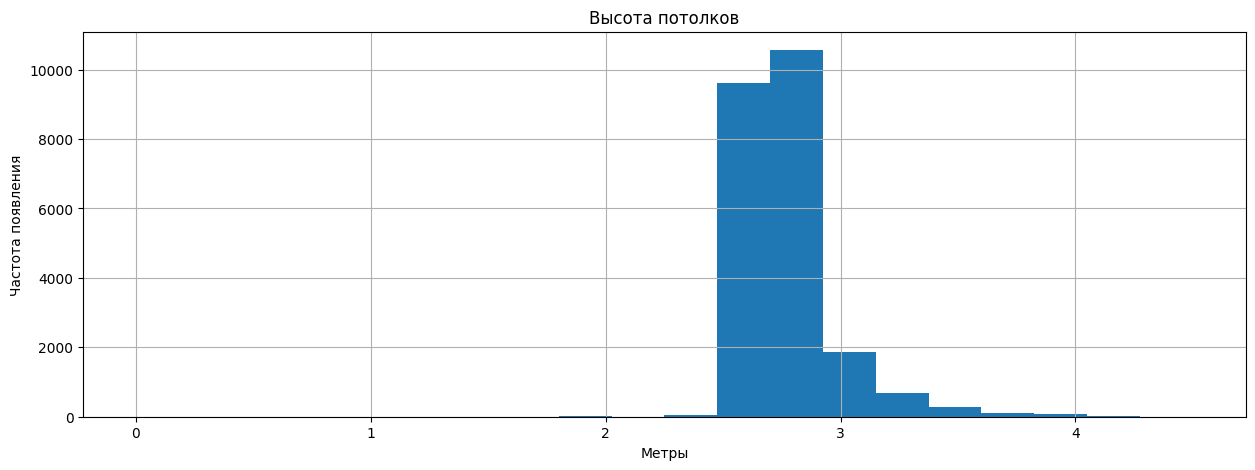

In [ ]:
pd.Series(df['ceiling_height']).plot(kind='hist', bins=20, grid=True, title='Высота потолков', range=(0, 4.5))
plt.xlabel('Метры')
plt.ylabel('Частота появления')
pass

- **7** Floor_type

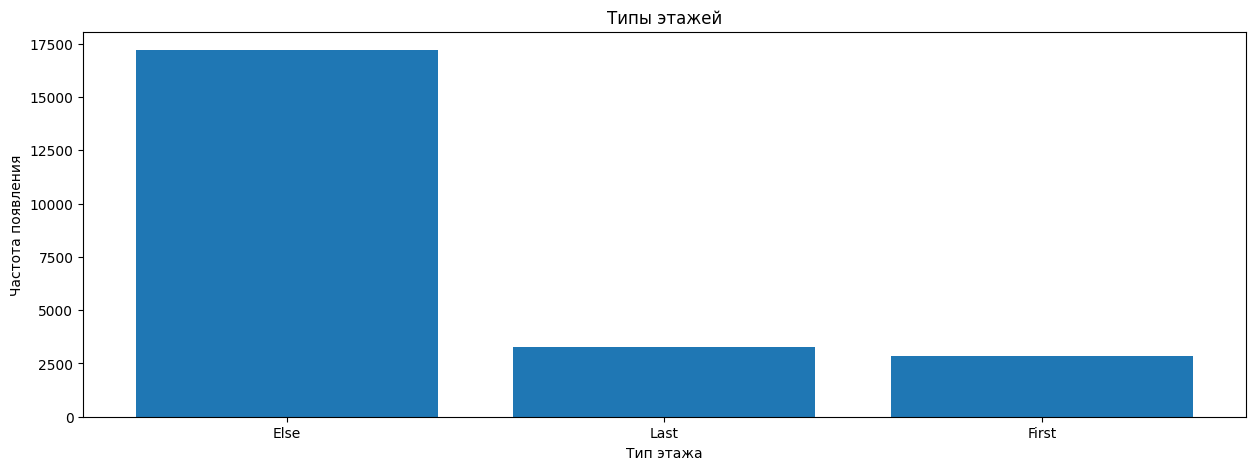

In [ ]:
counts = df['floor_type'].value_counts()
plt.bar(counts.index, counts.values)
plt.ylabel('Частота появления')
plt.xlabel('Тип этажа')
plt.title('Типы этажей')
pass

Очевидно, что количество квартир с последним или первым этажом куда меньше, чем остальных. Кстати, количество первых примерно равно количеству последних, значит все в порядке

- **8** Floors_total

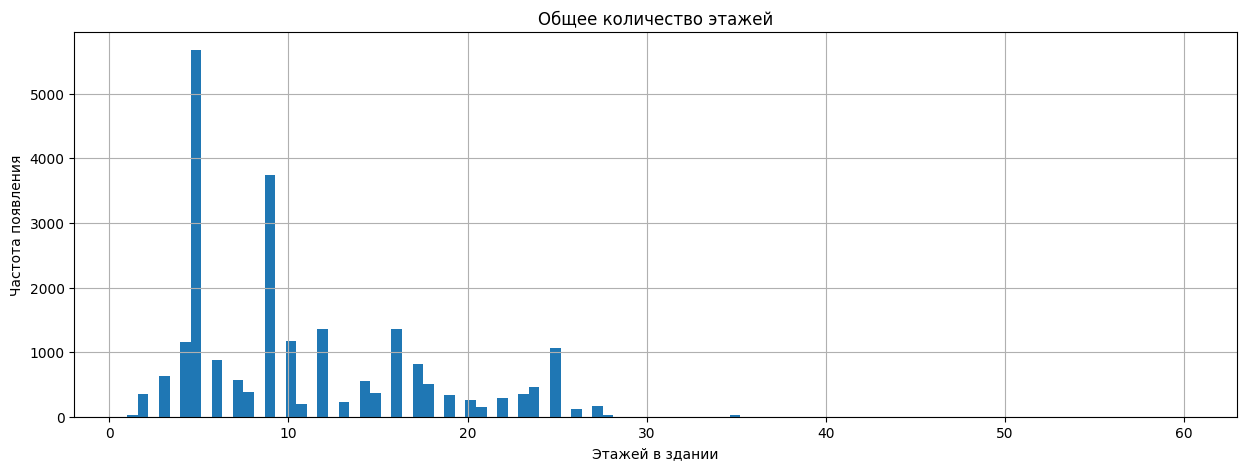

In [ ]:
pd.Series(df['floors_total']).plot(kind='hist', bins=100, grid=True, title='Общее количество этажей')
plt.xlabel('Этажей в здании')
plt.ylabel('Частота появления')
pass

In [ ]:
df[df['floors_total'] >30]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,quad_m_cost,publication_day,publication_month,publication_year,floor_type,city_center_nearest_km
397,15.0,5990000.0,54.0,2018-03-22,2.0,2.80,36.0,21.4,28.0,False,...,NaN,3.0,80.0,11.0,110925.93,Thursday,March,2018,Else,20.0
871,14.0,7777777.0,75.0,2017-11-16,2.0,2.80,35.0,40.5,23.0,False,...,NaN,3.0,80.0,169.0,103703.69,Thursday,November,2017,Else,20.0
1060,10.0,5200000.0,50.0,2015-11-06,2.0,2.80,35.0,39.0,15.0,False,...,NaN,3.0,80.0,281.0,104000.00,Friday,November,2015,Else,20.0
1697,11.0,3550000.0,28.0,2018-02-08,1.0,2.65,34.0,18.0,23.0,False,...,NaN,3.0,80.0,410.0,126785.71,Thursday,February,2018,Else,20.0
1917,13.0,10150000.0,74.0,2017-11-17,2.0,2.80,35.0,34.4,30.0,False,...,NaN,3.0,80.0,NaN,137162.16,Friday,November,2017,Else,20.0
2253,12.0,3800000.0,45.5,2018-06-28,2.0,2.88,60.0,27.4,4.0,False,...,342.0,3.0,614.0,166.0,83516.48,Thursday,June,2018,Else,49.0
2966,9.0,4300000.0,37.0,2017-08-08,1.0,2.80,35.0,14.0,15.0,False,...,NaN,3.0,80.0,50.0,116216.22,Tuesday,August,2017,Else,20.0
4855,12.0,5500000.0,50.0,2017-06-22,1.0,2.80,35.0,22.0,4.0,False,...,609.0,3.0,145.0,537.0,110000.00,Thursday,June,2017,Else,20.0
5807,17.0,8150000.0,80.0,2019-01-09,2.0,2.70,36.0,41.0,13.0,False,...,NaN,3.0,80.0,38.0,101875.00,Wednesday,January,2019,Else,20.0
5808,12.0,4590000.0,43.0,2018-10-19,1.0,2.80,35.0,14.0,11.0,False,...,NaN,3.0,80.0,82.0,106744.19,Friday,October,2018,Else,20.0


Исходя из того, что средний уровень этажа равен 3 метра и взяв междуэтажное расстояние примерно в 1 метр получаем, что для здания с 30+ этажей высота должна составлять 120+ метров, что уже является небоскребом(нежилым зданием). Отбросим эти значения, так как они не подходят для анализа

In [ ]:
df = df[df['floors_total'] < 30]

- **9** City_center_nearest

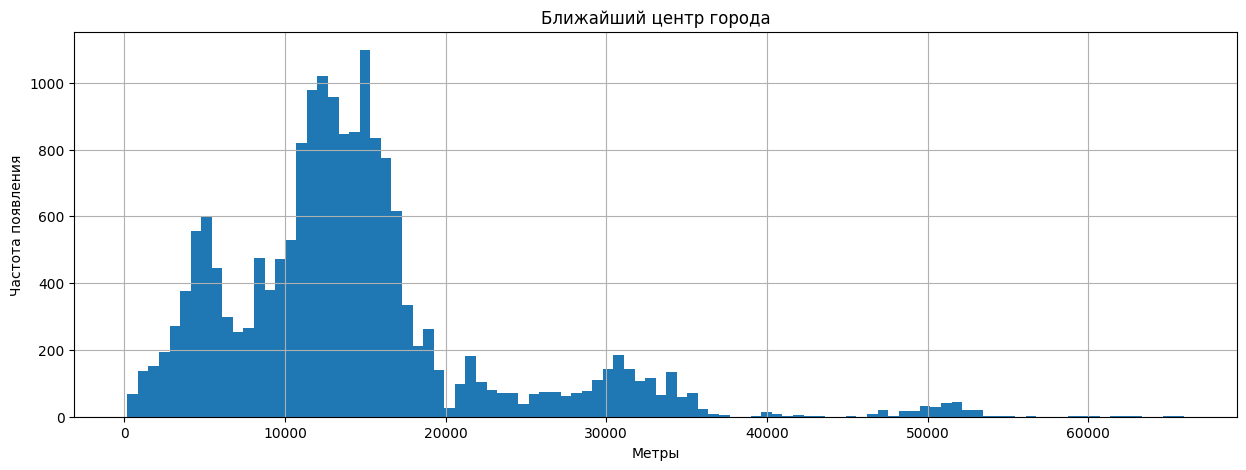

In [ ]:
pd.Series(df['city_center_nearest']).plot(kind='hist', bins=100, grid=True, title='Ближайший центр города')
plt.xlabel('Метры')
plt.ylabel('Частота появления')
pass

Тяжело что-либо сказать. Речи о распределении быть не может на этом графике.

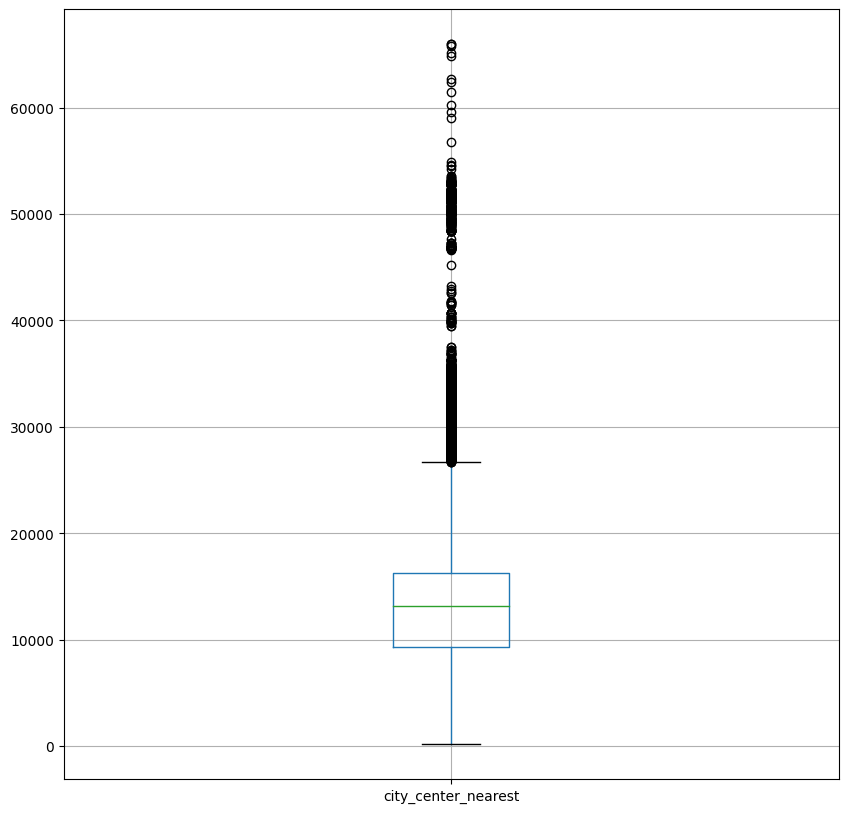

In [ ]:
df.boxplot(column='city_center_nearest',figsize=(10,10))
pass

Оставляем как есть

- **10** Parks_nearest

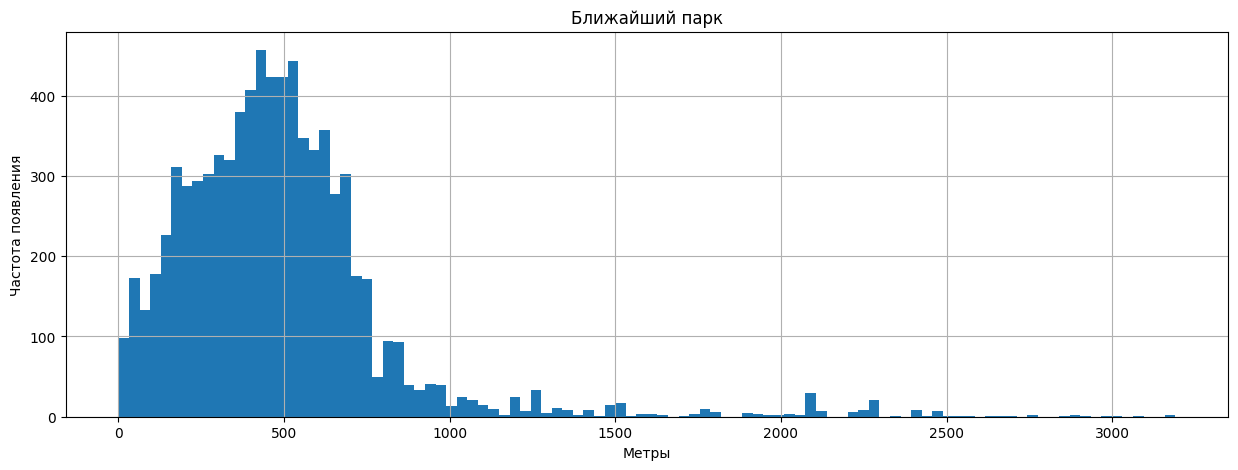

In [ ]:
pd.Series(df['parks_nearest']).plot(kind='hist', bins=100, grid=True, title='Ближайший парк')
plt.xlabel('Метры')
plt.ylabel('Частота появления')
pass

Та же ситуация, что и с центрами города, хотя тут больше похоже на нормальное распределение.

#### Изучим, как быстро продавались квартиры

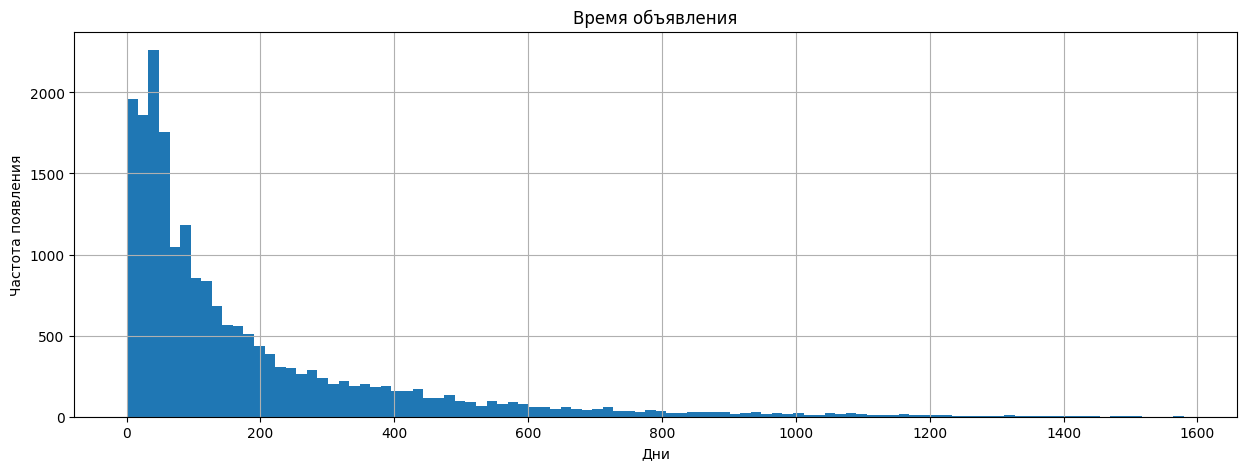

In [ ]:
pd.Series(df['days_exposition']).plot(kind='hist', bins=100, grid=True, title='Время объявления')
plt.xlabel('Дни')
plt.ylabel('Частота появления')
pass

In [ ]:
selling_speed = df.groupby('location').days_exposition.agg(mean=(lambda x: round(x.mean(), 2)), median='median')

In [ ]:
selling_speed = selling_speed.dropna()
selling_speed.sort_values('mean', ascending=False)

,mean,median
location,,
деревня Рабитицы,1007.0,1007.0
поселок Молодежное,786.0,1043.0
поселок Коробицыно,750.0,750.0
поселок типа Рябово,647.0,647.0
деревня Большая Пустомержа,627.0,627.0
...,...,...
поселок Платформа 69-й километр,18.0,18.0
поселок Новогорелово,17.9,10.0
коттеджный поселок Счастье,7.0,7.0


In [ ]:
selling_speed.sort_values('median', ascending=False)

,mean,median
location,,
поселок Молодежное,786.00,1043.0
деревня Рабитицы,1007.00,1007.0
поселок Коробицыно,750.00,750.0
поселок Любань,531.00,654.0
поселок типа Рябово,647.00,647.0
...,...,...
поселок Новогорелово,17.90,10.0
деревня Яльгелево,33.67,7.0
коттеджный поселок Счастье,7.00,7.0


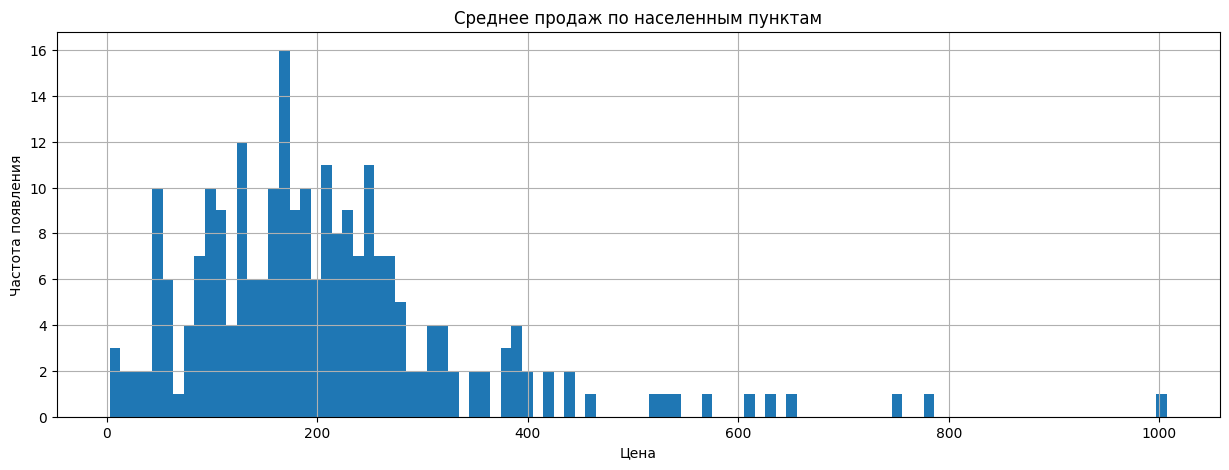

In [ ]:
pd.Series(selling_speed['mean']).plot(kind='hist', bins=100, grid=True, title='Среднее продаж по населенным пунктам')
plt.ylabel('Частота появления')
plt.xlabel('Цена')
pass

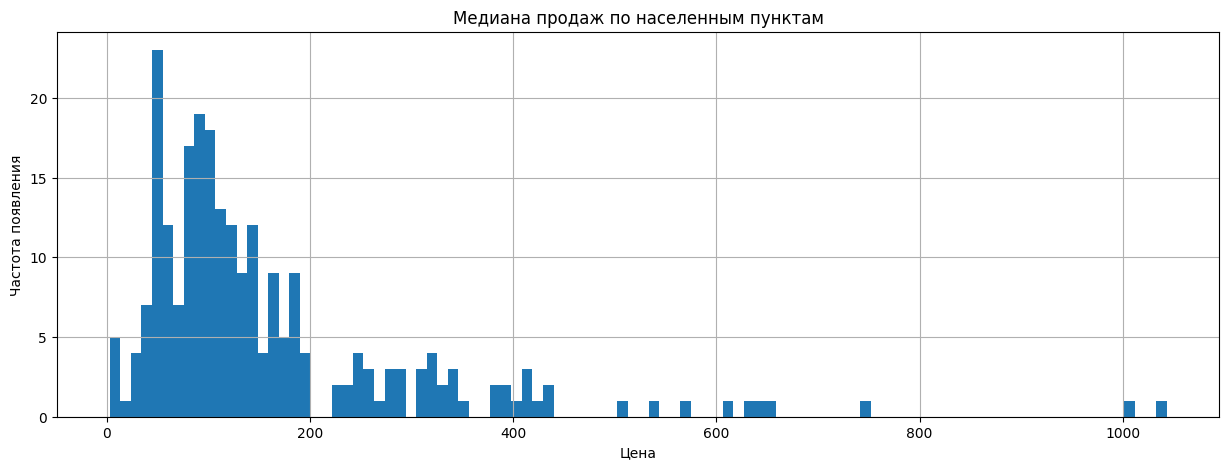

In [ ]:
pd.Series(selling_speed['median']).plot(kind='hist', bins=100, grid=True, title='Медиана продаж по населенным пунктам')
plt.ylabel('Частота появления')
plt.xlabel('Цена')
pass

Рассмотрим более детально медиану:

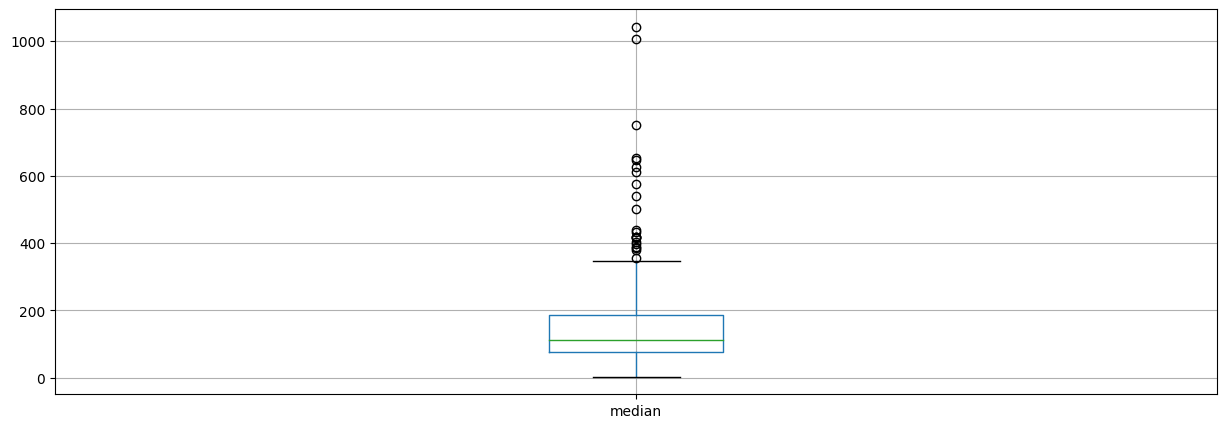

In [ ]:
selling_speed.boxplot(column='median')
pass

In [ ]:
selling_speed['median'].describe()

count     242.000000
mean      162.541322
std       151.349018
min         3.000000
25%        76.125000
50%       113.750000
75%       185.500000
max      1043.000000
Name: median, dtype: float64

Изходя из более подробного рассмотрения, можно увидеть, что медиана медиан продаж по городам находится на отметке 162. В целом логично предположить, что продажи до отметки q1 = 76 считаются "быстрыми", то есть быстрее, чем обычно. Продажи после этой отметки, но не позднее значения q3 = 185 - "Средние". Продажи позднее средних, но до значения полутораквартильного расстояния (q3-q1)\*1,5+q3 = 348 - "Долгие". Продажи после этой отметки - "Необычайно долгие". Резюмируем информацию:
* Продажи <= 76 дней = "Быстрые"
* 76 дней < Продажи <= 185 дней = "Средние"
* 185 дней < Продажи <= 348 дней = "Долгие"
* Продажи > 348 дней = "Необычайно долгие"

#### Изучим факторы, влияющии на цену ####

Для подготовки с некоторыми сравнениям сделаем сводные таблицы. но для некоторых будем использовать диаграмму рассеяния, так как значений очень много

- **1** Связь с общей площадью

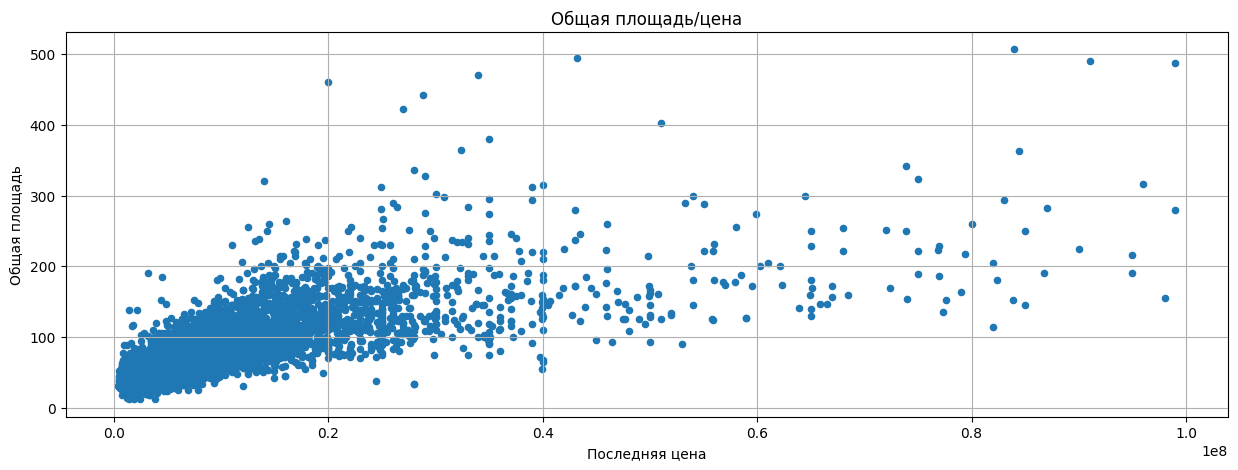

In [ ]:
df.plot(x='last_price', y='total_area', kind='scatter', grid=True, title='Общая площадь/цена')
plt.ylabel('Общая площадь')
plt.xlabel('Последняя цена')
pass

In [ ]:
df[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.000000,0.757939
total_area,0.757939,1.000000


Ну тут у нас почти прямая зависимость в начале, дальше больше рассеивается, но в целом зависимость продолжается. Коэффициент корреляции поддерживает данный вывод.

- **2** Связь с жилой площадью

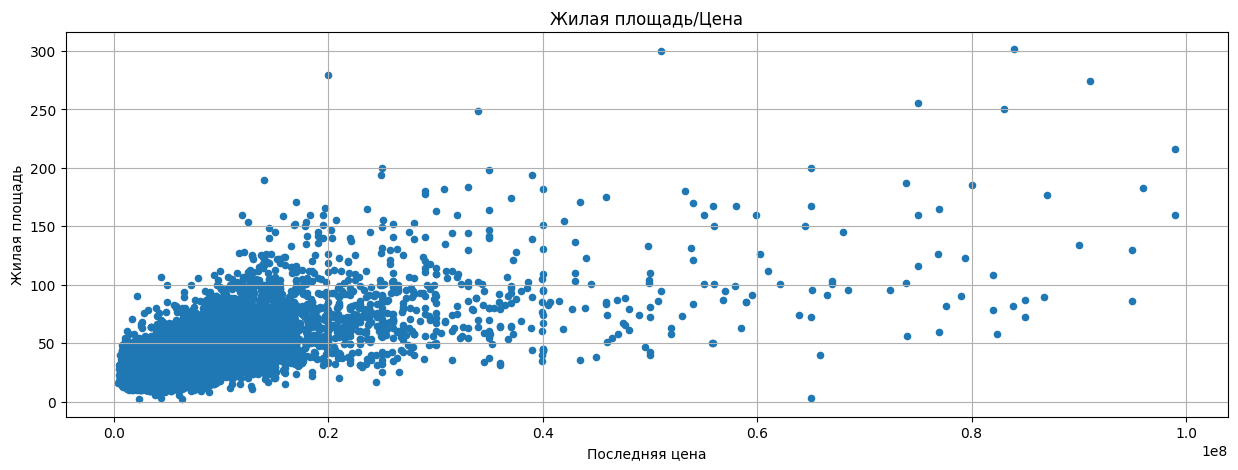

In [ ]:
df.plot(x='last_price', y='living_area', kind='scatter', grid=True, title='Жилая площадь/Цена')
plt.ylabel('Жилая площадь')
plt.xlabel('Последняя цена')
pass

In [ ]:
df[['last_price', 'living_area']].corr()

,last_price,living_area
last_price,1.000000,0.665821
living_area,0.665821,1.000000


Есть небольшие выбросы, но в целом зависимость также прямая, хотя коэффициент уже падает.

- **3** Связь с площадью кухни

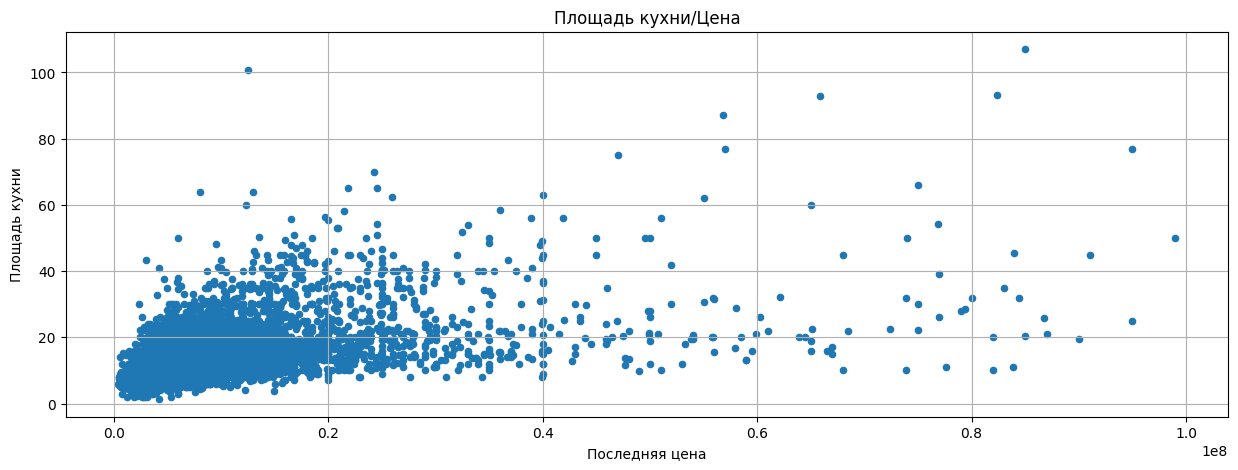

In [ ]:
df.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, title='Площадь кухни/Цена')
plt.ylabel('Площадь кухни')
plt.xlabel('Последняя цена')
pass

In [ ]:
df[['last_price', 'kitchen_area']].corr()

,last_price,kitchen_area
last_price,1.000000,0.588381
kitchen_area,0.588381,1.000000


Вот тут уже не очень прямая. В целом не сильно зависит цена от площади кухни. Коэффициент также почти 0.5 - полный хаос.

- **4** Связь с количеством комнат

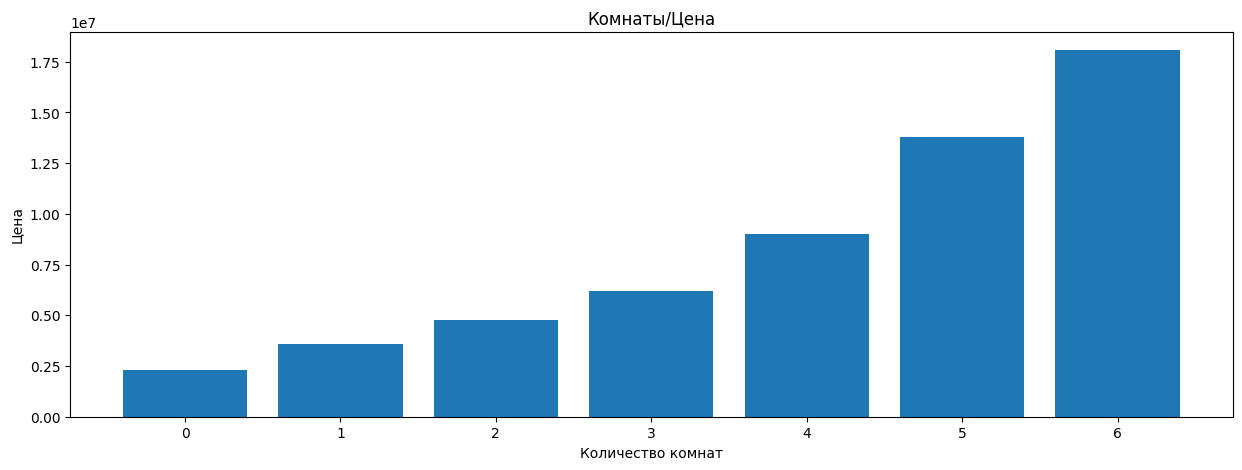

In [ ]:
rooms = df.pivot_table(values='last_price', index='rooms', aggfunc='median')
plt.bar(rooms.index, rooms['last_price'].values)
plt.ylabel('Цена')
plt.xlabel('Количество комнат')
plt.title('Комнаты/Цена')
pass

Ну вот тут, как и хотелось, логичная прямая зависимость

- **5** Связь с типом этажа

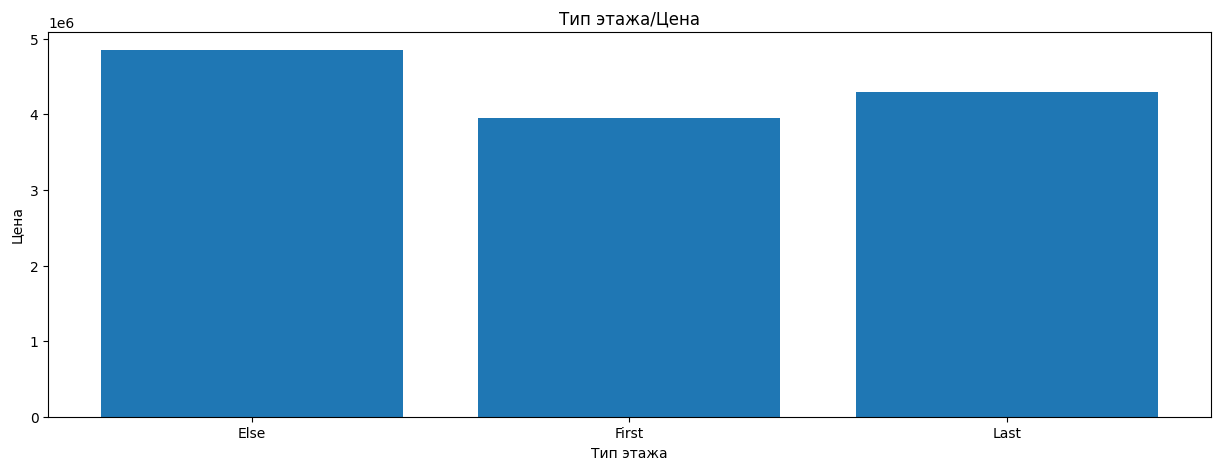

In [ ]:
floors = df.pivot_table(values='last_price', index='floor_type', aggfunc='median')
plt.bar(floors.index, floors['last_price'].values)
plt.ylabel('Цена')
plt.xlabel('Тип этажа')
plt.title('Тип этажа/Цена')
pass

На удивление одинаково, что странно, потому что квартир, очевидно, меньше. Это говорит о том, что люди готовы переплатить для квартир, расположенных на первом и последнем этажах

- **6** Связь с днем размещения объявления

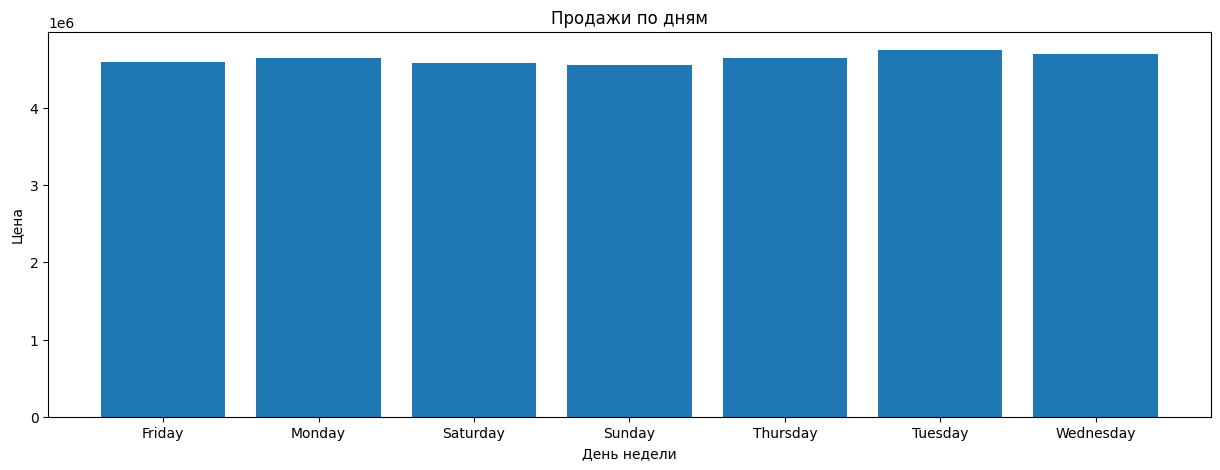

In [ ]:
days = df.pivot_table(values='last_price', index='publication_day', aggfunc='median')
plt.bar(days.index, days['last_price'].values)
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.title('Продажи по дням')
pass

Не зависит от дня недели

- **7** Связь с месяцем размещения

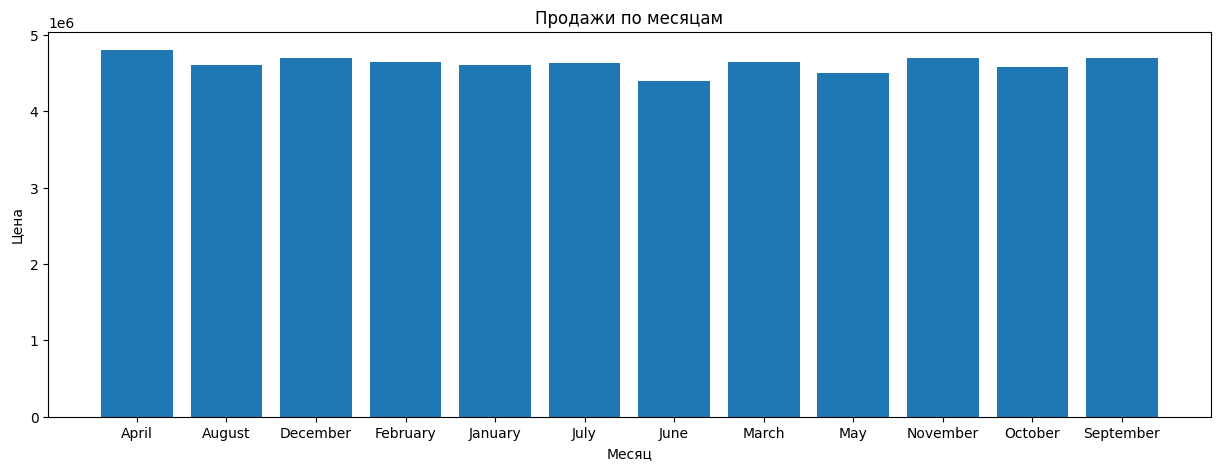

In [ ]:
months = df.pivot_table(values='last_price', index='publication_month', aggfunc='median')
plt.bar(months.index, months['last_price'].values)
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.title('Продажи по месяцам')
pass

Не зависит от месяца

- **8** Связь с годом размещения

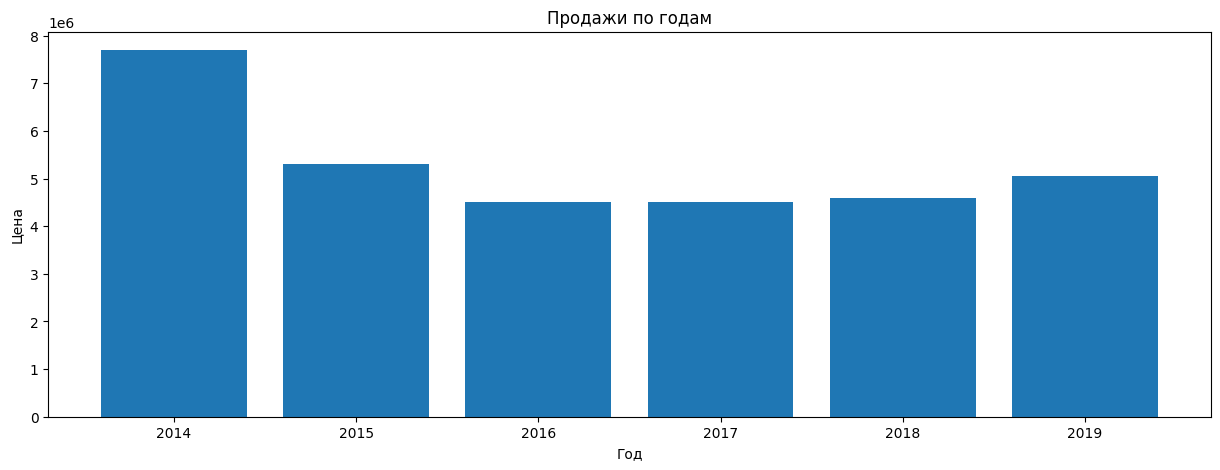

In [ ]:
years = df.pivot_table(values='last_price', index='publication_year', aggfunc='median')
plt.bar(years.index, years['last_price'].values)
plt.ylabel('Цена')
plt.xlabel('Год')
plt.title('Продажи по годам')
pass

А вот по годам есть зависимость. Куда больше дома стоили раньше, в самом первом году - 2014. Посмотрим глубже.

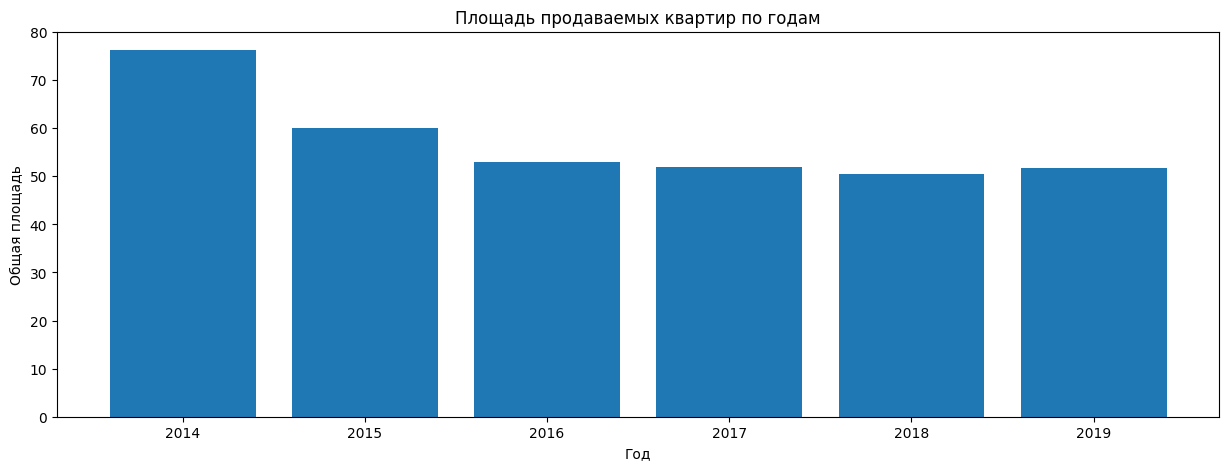

In [ ]:
years_square = df.pivot_table(values='total_area', index='publication_year', aggfunc='median')
plt.bar(years_square.index, years_square['total_area'].values)
plt.ylabel('Общая площадь')
plt.xlabel('Год')
plt.title('Площадь продаваемых квартир по годам')
pass

Оказалось, что цена была напрямую связана с площадью, так что год все же не влияет на стоимость.

#### Посчитаем среднюю цену квадратного метра

Выведем сводную таблицу, в которой будет 10 наибольших количеств объявлений по городам

In [ ]:
quad_price = df.groupby('location').agg(number=('rooms','count'), avg_quad_m_price=('quad_m_cost', 'median')).\
sort_values('number', ascending=False).head(10)
quad_price

,number,avg_quad_m_price
location,,
Санкт-Петербург,15382,104547.725
поселок Мурино,552,86059.295
поселок Шушары,439,76829.270
Всеволожск,398,65789.470
Пушкин,368,99993.590
Колпино,337,74722.220
поселок Парголово,326,91780.225
Гатчина,307,67796.610
деревня Кудрово,299,91860.470


Город с наибольшей ценой квадартного метра

In [ ]:
quad_price[quad_price['avg_quad_m_price'] == quad_price['avg_quad_m_price'].max()]

,number,avg_quad_m_price
location,,
Санкт-Петербург,15382,104547.725


С наименьшей ценой квадратного метра

In [ ]:
quad_price[quad_price['avg_quad_m_price'] == quad_price['avg_quad_m_price'].min()]

,number,avg_quad_m_price
location,,
Выборг,236,58133.215


#### Вычислим среднюю стоимость квартир в Санкт-Петербурге по удаленности от центра

In [ ]:
price = df[df['location'] == 'Санкт-Петербург'].groupby('city_center_nearest_km').\
agg(price_for_km=('last_price', lambda x: int(x.median())), number=('rooms', 'count'))

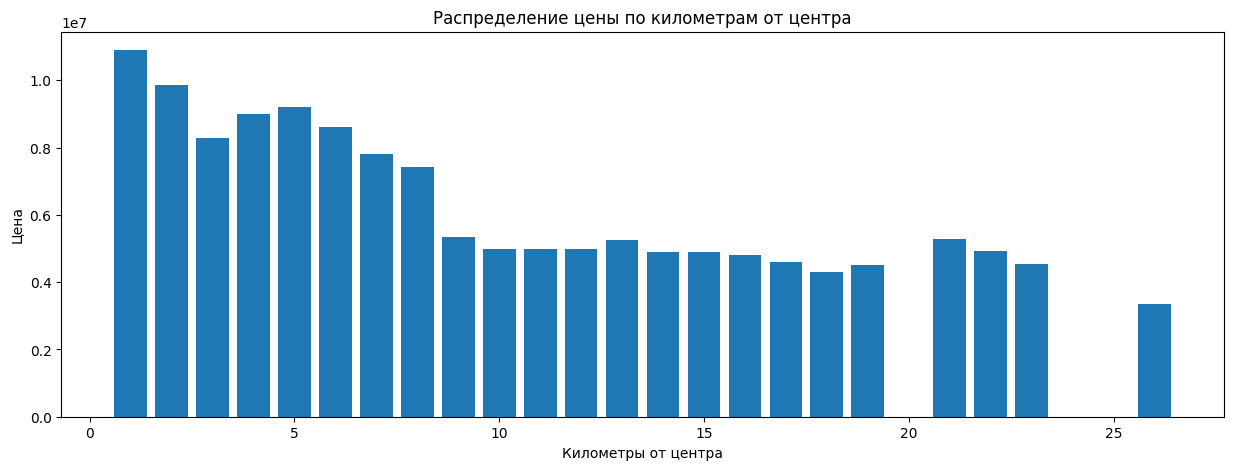

In [ ]:
price = price[price['number'] > 30] #Отбросим те строки, где количество квартир небольшое(Да, мы отбросили 0 км тоже)
plt.bar(price.index, price['price_for_km'].values)
plt.title('Распределение цены по километрам от центра')
plt.xlabel('Километры от центра')
plt.ylabel('Цена')
pass

Из данной гистограммы можно сделать очевидный вывод о том, что чем ближе квартира к центру, тем она дороже. Но также возникает интересный момент на км = 3. Видимо, либо на такой удаленности мешает ландшафт(много рек), либо люди готовы переплатить только за 1-2 км.

**Вывод по разделу 4:**

В ходе проведения исследовательского анализа рассмотрели самые важные компоненты DataFrame, а также сравнили влияние разных параметров на конечную цену(Результаты будут опубликованы в финальном выводе). Выделил города/поселки с максимальной/минимальной ценой за квадратный метр. Рассмотрели конкретно Санкт-Петербург, так как изначально было интересно, влияет ли расстояние от центра на стоимость. Получились необычные результаты.

### Напишите общий вывод

- **1. Знакомство с DataFrame:**
- **1.1** Рассмотрели данные со стороны применимости для анализа. Несмотря на определенное количество пропусков, полученная информация оказалась достаточной для начала анализирования.
- **1.2** Построили гистограммы по каждому столбцу, чтобы понять, насколько данные приближены к реальности. В тех, где нужно, нашли около нормальное распределение, соответственно все в порядке.
- **2. Предобработка DataFrame:**
- **2.1** Во всех столбцах избавились от пропусков, пытаясь сохранить как можно больше строк. Удалили аномальные значения или заменили их на подходящие под соответствующие столбцы.
- **2.2** Избавились от явных выбросов, явных дубликатов, которые могли бы повлиять на результаты исследований.
- **2.3** Переименовали значения и столбцы для соответствия стандартам
- **3. Добавление столбцов:**
- **3.1** Добавили столбцы с категориями для упрощения вычислений.
- **3.2** Провели базовые манипуляции для добавления столбцов, наиболее интересующих нас.
- **3.3** Разделили дату на дни, месяцы и годы, создав соответствующие столбцы.
- **4. Исследовательский анализ:**
- **4.1** Изучение параметров:
- **4.1.1** Рассмотрели все значимые параметры в DataFrame со стороны статистики и откорректировали значения для дальнейшего анализа.
- **4.1.2** В результате получили полноценный DataFrame, в котором все значения находятся в пределах разумных.
- **4.2** Рассмотрели, насколько быстро продавались квартиры. Построили графики, оценили скорость.
- **4.2.1** Вывод из раздела:
    * Продажи <= 76 дней = "Быстрые"
    * 76 дней < Продажи <= 185 дней = "Средние"
    * 185 дней < Продажи <= 348 дней = "Долгие"
    * Продажи > 348 дней = "Необычайно долгие"
- **4.3** Рассмотрели все значимые факторы, которые могут повлиять на общую цену.
- **4.3.1** Вывод из раздела - на цену влияют:
    * Общая площадь
    * Жилая площадь
    * Количество комнат
    
Остальные факторы оказались недостаточно значимыми
- **4.4** Оценка среднего квадратного метра по населенным пунктам.
- **4.4.1** Изучили среднюю квадратуру регионов с наибольшим количеством объявлений, а также узнали, что в Санкт-Петербурге самый дорогой квадратный метр, а в Выборге - самый дешеый.
- **4.5** Оценили стоимость объектов в Санкт-Петербурге в завимиости от удаленности от центра.
- **4.5.1** Построили графики и нашли зависимость между ценой объекта и удаленностью от центра. Зависимость оказалась не до конца прямой. Удаленность в 3-5 километров выдает необычный результат, что может говорить о том, что большинство людей готовы переплачивать только за расстояние в 1-2 км.
- **5.1 Результаты проведенного анализа:**
    * Разобрались, с какой скоростью должна продаваться квартира, используя статистику и графики размаха
    * Установили важнейшие факторы, влияющие на стоимость
    * Рассчитали среднюю квадратуру для каждого населенного пункта
    * Нашли необычную зависимость между расстоянием от центра и стоимостью